# <u>Implementation from Scratch</u>

<br />

I am going to implement algorithms by using the least kinds of libraries such as Numpy possible.

## [Task 1] Create a Class of Linear Regression from Scratch

<br />

I will create a class of linear regression and incorporate it to the pipeline of regressions on the "sprint2" directory.

#### Hypothesis Function

<br />

I implement the following hypothesis function of linear regression.

$$
h_\theta(x) = \theta_0 x_0 + \theta_1 x_1 + \cdots + \theta_j x_j + \theta_n x_n \ \ \ (x_0=1)
$$

$x$: feature vector

$\theta$: parameter vector

$n$: the number of features

$x_j$: jth feature vector

$\theta_j$: jth parameter(weight) vector

I will implement the hypothesis function that can apply to any $n$, the number of features.

<br />

In addition, the following equation is the vector format.

$$
h_\theta(x) = \theta^T x
$$

#### Objective Function

<br />


I will implement the following objective function of linear regression. This is the MSE, mean square error divided by 2 to use the steepest descent method easily.

$$
J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2
$$

$m$: the number of data input

$h_\theta()$: hypothesis function

$x^{(i)}$: feature vector of ith sample

$y^{(i)}$: correct values of ith sample

#### Steepest Descent Method

<br />

I will fit datasets by steepest descent method. The following equation is to update the jth parameter.

$$
\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^m[(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}]
$$

$\alpha$: learning rate

$i$: index of a sample

$j$: index of a feature

### Validate the Class

<br />

I am going to validate the class by using the "House Prices: Advanced Regression Techniques" datasets on Kaggle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sys

In [2]:
# Prepare a dataset for the validation

# Import the dataset
train = pd.read_csv('"House Prices- Advanced Regression Techniques".train.csv')
test = pd.read_csv('"House Prices- Advanced Regression Techniques".test.csv')

# Split the datasets into explanatory and objective variables
X = train.loc[:,["GrLivArea", "YearBuilt"]].values
y = train.SalePrice.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [3]:
# Standardize the dataset

# Initialize the class
scaler = StandardScaler()

# Fit the dataset
scaler.fit(X_train)

# Transfer the datasets
std_X_train = scaler.transform(X_train)

# Fit the dataset
scaler.fit(X_test)

# Transfer the datasets
std_X_test = scaler.transform(X_test)

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarni

In [4]:
# Import a class

# Add a path searching for specific modules
sys.path.append("../scratch/model/")

# Import "ScratchLinearRegression"
from regression_pipeline2 import ScratchLinearRegression

In [5]:
# Initialize the class

slr = ScratchLinearRegression(num_iter=10000, lr=0.0001, bias=True, verbose=True)

In [6]:
slr.fit(std_X_train, y_train, std_X_test, y_test)

19425722569.487778
19826462710.365086
19425275701.895546
19825911052.20132
19424828938.377453
19825359516.900234
19424382278.9092
19824808104.433784
19423935723.46653
19824256814.773945
19423489272.025154
19823705647.892685
19423042924.56082
19823154603.761993
19422596681.04926
19822603682.353848
19422150541.46622
19822052883.640244
19421704505.787457
19821502207.593185
19421258573.98872
19820951654.18468
19420812746.045773
19820401223.386734
19420367021.934387
19819850915.171375
19419921401.63034
19819300729.51063
19419475885.1094
19818750666.376526
19419030472.347366
19818200725.741104
19418585163.320023
19817650907.57641
19418139958.003162
19817101211.854492
19417694856.37259
19816551638.547413
19417249858.404114
19816002187.62724
19416804964.073555
19815452859.06604
19416360173.35672
19814903652.835896
19415915486.229435
19814354568.908886
19415470902.66754
19813805607.257103
19415026422.646866
19813256767.852646
19414582046.143253
19812708050.667618
19414137773.132553
19812159455.

19217570241.377754
19568854639.098972
19217171846.821323
19568360276.82253
19216773545.030052
19567866024.342594
19216375335.982292
19567371881.634144
19215977219.656418
19566877848.67217
19215579196.030796
19566383925.43166
19215181265.083797
19565890111.887608
19214783426.7938
19565396408.01503
19214385681.139194
19564902813.78892
19213988028.09837
19564409329.18431
19213590467.649715
19563915954.176197
19213192999.77163
19563422688.73963
19212795624.442524
19562929532.84963
19212398341.640804
19562436486.48124
19212001151.344887
19561943549.609497
19211604053.533188
19561450722.209454
19211207048.18413
19560958004.25617
19210810135.276157
19560465395.724693
19210413314.787693
19559972896.590103
19210016586.69718
19559480506.827473
19209619950.98306
19558988226.411873
19209223407.623783
19558496055.318394
19208826956.59781
19558003993.52212
19208430597.883595
19557512040.998146
19208034331.459606
19557020197.72158
19207638157.304317
19556528463.667526
19207242075.39619
19556036838.81

19065028223.008434
19379160190.83147
19064665344.376575
19378707910.598896
19064302550.225014
19378255730.579292
19063939840.534046
19377803650.749844
19063577215.283962
19377351671.08775
19063214674.455082
19376899791.570217
19062852218.027702
19376448012.174458
19062489845.98214
19375996332.877674
19062127558.298706
19375544753.657093
19061765354.95773
19375093274.489933
19061403235.939533
19374641895.35343
19061041201.22445
19374190616.224815
19060679250.79282
19373739437.081337
19060317384.624973
19373288357.900227
19059955602.701263
19372837378.65874
19059593905.002037
19372386499.334137
19059232291.507645
19371935719.90368
19058870762.198452
19371485040.344627
19058509317.05482
19371034460.634254
19058147956.05712
19370583980.749836
19057786679.18571
19370133600.66866
19057425486.420986
19369683320.36801
19057064377.74332
19369233139.825176
19056703353.133095
19368783059.01746
19056342412.570713
19368333077.92216
19055981556.03656
19367883196.516594
19055620783.511036
19367433414

18937034731.362637
19219304241.589073
18936701647.926266
19218887342.058666
18936368642.02067
19218470534.69373
18936035713.62778
19218053819.473312
18935702862.72951
19217637196.37646
18935370089.307793
19217220665.382244
18935037393.344543
19216804226.469727
18934704774.821716
19216387879.61797
18934372233.72124
19215971624.80605
18934039770.025055
19215555462.013042
18933707383.715115
19215139391.21804
18933375074.773365
19214723412.400124
18933042843.181763
19214307525.538387
18932710688.922268
19213891730.611935
18932378611.976845
19213476027.599854
18932046612.327465
19213060416.48127
18931714689.9561
19212644897.23528
18931382844.84472
19212229469.841007
18931051076.97531
19211814134.277573
18930719386.329865
19211398890.524105
18930387772.890354
19210983738.55974
18930056236.638786
19210568678.3636
18929724777.55715
19210153709.91484
18929393395.62746
19209738833.192596
18929062090.831707
19209324048.17603
18928730863.151913
19208909354.844284
18928399712.570084
19208494753.176

18813752784.894215
19064651604.628727
18813448394.86814
19064268853.620037
18813144075.681145
19063886187.019356
18812839827.316715
19063503604.807503
18812535649.75834
19063121106.965336
18812231542.989502
19062738693.473694
18811927506.993683
19062356364.313423
18811623541.754402
19061974119.465393
18811319647.25514
19061591958.910446
18811015823.479404
19061209882.629463
18810712070.41071
19060827890.60331
18810408388.03256
19060445982.81285
18810104776.328472
19060064159.23897
18809801235.281967
19059682419.862553
18809497764.876568
19059300764.664482
18809194365.095795
19058919193.625645
18808891035.923183
19058537706.726944
18808587777.342278
19058156303.949272
18808284589.336597
19057774985.273544
18807981471.889694
19057393750.680656
18807678424.985115
19057012600.151527
18807375448.606403
19056631533.66708
18807072542.73712
19056250551.20822
18806769707.360817
19055869652.755894
18806466942.461063
19055488838.29102
18806164248.02142
19055108107.794537
18805861624.025448
190547

18694708398.57076
18914587407.02812
18694431710.45194
18914237705.861385
18694155086.712605
18913888081.60514
18693878527.33775
18913538534.24196
18693602032.312366
18913189063.754406
18693325601.621452
18912839670.125053
18693049235.250008
18912490353.33648
18692772933.18303
18912141113.37127
18692496695.40553
18911791950.212006
18692220521.90251
18911442863.841274
18691944412.658997
18911093854.241673
18691668367.659996
18910744921.3958
18691392386.890537
18910396065.286255
18691116470.335636
18910047285.89565
18690840617.980324
18909698583.206585
18690564829.809635
18909349957.201675
18690289105.808598
18909001407.86354
18690013445.962254
18908652935.17481
18689737850.255642
18908304539.118095
18689462318.673805
18907956219.676037
18689186851.2018
18907607976.83126
18688911447.82467
18907259810.566414
18688636108.527477
18906911720.864132
18688360833.295277
18906563707.707054
18688085622.113132
18906215771.07784
18687810474.966103
18905867910.959145
18687535391.83927
18905520127.333

18585240013.63094
18775867033.392433
18584988793.94941
18775547798.743847
18584737632.709435
18775228634.104614
18584486529.89738
18774909539.45889
18584235485.49965
18774590514.79084
18583984499.502598
18774271560.08462
18583733571.89263
18773952675.324398
18583482702.65612
18773633860.494343
18583231891.779465
18773315115.57862
18582981139.249065
18772996440.561417
18582730445.051308
18772677835.426907
18582479809.1726
18772359300.159275
18582229231.599342
18772040834.742702
18581978712.317947
18771722439.161392
18581728251.31482
18771404113.39953
18581477848.576374
18771085857.44131
18581227504.089027
18770767671.27095
18580977217.839207
18770449554.872635
18580726989.813324
18770131508.23059
18580476819.99781
18769813531.329014
18580226708.379097
18769495624.152138
18579976654.943615
18769177786.68417
18579726659.677803
18768860018.909336
18579476722.568092
18768542320.811863
18579226843.60093
18768224692.37599
18578977022.762764
18767907133.585945
18578727260.04004
18767589644.425

18655644923.240814
18490649321.287437
18655352017.50281
18490420104.211433
18655059175.81939
18490190940.447838
18654766398.176067
18489961829.98424
18654473684.558376
18489732772.808205
18654181034.95184
18489503768.90731
18653888449.342003
18489274818.269142
18653595927.714397
18489045920.881283
18653303470.05456
18488817076.731327
18653011076.348045
18488588285.806854
18652718746.58039
18488359548.09546
18652426480.737152
18488130863.584747
18652134278.80388
18487902232.26231
18651842140.766136
18487673654.115753
18651550066.609474
18487445129.13268
18651258056.31947
18487216657.300697
18650966109.881683
18486988238.60741
18650674227.281685
18486759873.040447
18650382408.505043
18486531560.587406
18650090653.53735
18486303301.235924
18649798962.36417
18486075094.973614
18649507334.9711
18485846941.7881
18649215771.34372
18485618841.66701
18648924271.467625
18485390794.597984
18648632835.3284
18485162800.56864
18648341462.911655
18484934859.56663
18648050154.20298
18484706971.57959
1

18538889435.57085
18399544335.461166
18538622024.01024
18399336305.77765
18538354670.74743
18399128324.468185
18538087375.76927
18398920391.521496
18537820139.062614
18398712506.92631
18537552960.614315
18398504670.671368
18537285840.41123
18398296882.745396
18537018778.440212
18398089143.13713
18536751774.68813
18397881451.835304
18536484829.14184
18397673808.828674
18536217941.788227
18397466214.105972
18535951112.614143
18397258667.655952
18535684341.60648
18397051169.46736
18535417628.7521
18396843719.528946
18535150974.0379
18396636317.829468
18534884377.450752
18396428964.357685
18534617838.977547
18396221659.102356
18534351358.605167
18396014402.052242
18534084936.320515
18395807193.196106
18533818572.110477
18395600032.522724
18533552265.961956
18395392920.02085
18533286017.86186
18395185855.679276
18533019827.79708
18394978839.486774
18532753695.75454
18394771871.432114
18532487621.721138
18394564951.50408
18532221605.68379
18394358079.691463
18531955647.629414
18394151255.983

18314032195.774582
18428380255.091766
18313844048.359295
18428136895.94349
18313655944.684635
18427893589.671318
18313467884.740414
18427650336.263355
18313279868.516438
18427407135.707684
18313091896.002518
18427163987.99241
18312903967.188473
18426920893.105625
18312716082.064117
18426677851.035442
18312528240.619274
18426434861.76996
18312340442.843758
18426191925.29729
18312152688.727394
18425949041.60555
18311964978.260014
18425706210.682842
18311777311.431446
18425463432.51729
18311589688.231514
18425220707.097008
18311402108.650063
18424978034.41013
18311214572.676918
18424735414.44477
18311027080.301926
18424492847.18906
18310839631.51492
18424250332.63113
18310652226.305748
18424007870.759113
18310464864.664253
18423765461.561146
18310277546.580284
18423523105.025364
18310090272.043694
18423280801.13991
18309903041.04433
18423038549.892933
18309715853.57205
18422796351.27258
18309528709.61671
18422554205.26699
18309341609.16817
18422312111.864326
18309154552.21629
18422070071.

18327351973.50937
18236011480.051685
18327130527.76176
18235841468.81663
18326909129.959965
18235671497.096416
18326687780.093216
18235501564.881824
18326466478.150734
18235331672.163654
18326245224.121754
18235161818.93271
18326024017.9955
18234992005.179783
18325802859.761204
18234822230.89567
18325581749.408108
18234652496.071194
18325360686.92544
18234482800.697147
18325139672.302452
18234313144.764343
18324918705.528385
18234143528.263596
18324697786.59248
18233973951.185707
18324476915.483986
18233804413.521507
18324256092.192154
18233634915.261803
18324035316.706234
18233465456.39742
18323814589.015495
18233296036.919174
18323593909.109173
18233126656.817886
18323373276.976547
18232957316.0844
18323152692.60687
18232788014.709522
18322932155.98941
18232618752.684093
18322711667.113434
18232449529.998943
18322491225.968216
18232280346.644913
18322270832.543026
18232111202.612827
18322050486.827133
18231942097.89354
18321830188.809822
18231773032.47787
18321609938.480373
182316040

18166125467.23372
18235808936.087704
18165971697.303535
18235607275.349575
18165817963.104557
18235405658.114563
18165664264.62846
18235204084.372906
18165510601.86692
18235002554.114853
18165356974.81163
18234801067.330647
18165203383.45426
18234599624.010532
18165049827.786503
18234398224.144764
18164896307.80004
18234196867.72359
18164742823.48656
18233995554.737278
18164589374.837753
18233794285.17607
18164435961.845314
18233593059.03023
18164282584.500935
18233391876.290024
18164129242.796314
18233190736.94571
18163975936.723145
18232989640.98756
18163822666.273132
18232788588.405838
18163669431.437973
18232587579.19081
18163516232.20938
18232386613.33276
18163363068.579052
18232185690.821957
18163209940.538696
18231984811.648674
18163056848.080025
18231783975.803196
18162903791.194744
18231583183.2758
18162750769.87458
18231382434.056778
18162597784.111233
18231181728.136406
18162444833.89643
18230981065.50498
18162291919.22189
18230780446.152786
18162139040.079327
18230579870.07

18104307565.574997
18154454025.42428
18104168158.421078
18154269883.274403
18104028783.65295
18154085780.70181
18103889441.26308
18153901717.69762
18103750131.243923
18153717694.25299
18103610853.587936
18153533710.359055
18103471608.28759
18153349766.00697
18103332395.33534
18153165861.187874
18103193214.723663
18152981995.892925
18103054066.44501
18152798170.11327
18102914950.491875
18152614383.840073
18102775866.856705
18152430637.064472
18102636815.531986
18152246929.777645
18102497796.510197
18152063261.970737
18102358809.7838
18151879633.634922
18102219855.345284
18151696044.76136
18102080933.18713
18151512495.341213
18101942043.301815
18151328985.365654
18101803185.68182
18151145514.82586
18101664360.31964
18150962083.71299
18101525567.207756
18150778692.018227
18101386806.338657
18150595339.73275
18101248077.704834
18150412026.847725
18101109381.298782
18150228753.354347
18100970717.112995
18150045519.243793
18100832085.139965
18149862324.507248
18100693485.37219
18149679169.13

18047252763.847553
18078809517.614162
18047126609.477985
18078641602.53266
18047000484.407906
18078473723.399647
18046874388.630486
18078305880.2071
18046748322.138916
18078138072.946976
18046622284.92636
18077970301.611263
18046496276.986004
18077802566.19193
18046370298.31105
18077634866.68095
18046244348.894657
18077467203.070312
18046118428.730034
18077299575.351997
18045992537.810356
18077131983.517975
18045866676.12881
18076964427.560238
18045740843.678604
18076796907.47078
18045615040.452923
18076629423.241577
18045489266.44495
18076461974.864624
18045363521.647903
18076294562.331917
18045237806.054966
18076127185.635445
18045112119.659336
18075959844.7672
18044986462.45423
18075792539.71919
18044860834.432835
18075625270.483406
18044735235.588364
18075458037.05185
18044609665.91402
18075290839.416523
18044484125.403004
18075123677.56944
18044358614.048546
18074956551.502598
18044233131.843826
18074789461.208008
18044107678.782085
18074622406.67768
18043982254.85652
18074455387.

17995963889.500603
18010278322.090553
17995849645.49707
18010125049.750046
17995735428.019848
18009971810.09077
17995621237.062775
18009818603.105442
17995507072.619656
18009665428.78677
17995392934.684334
18009512287.127495
17995278823.250633
18009359178.12031
17995164738.312378
18009206101.75796
17995050679.863407
18009053058.03317
17994936647.897552
18008900046.938652
17994822642.408646
18008747068.467136
17994708663.390526
18008594122.611362
17994594710.83703
18008441209.364056
17994480784.741993
18008288328.71794
17994366885.09926
18008135480.665768
17994253011.90266
18007982665.200264
17994139165.146053
18007829882.314167
17994025344.823277
18007677132.000217
17993911550.928177
18007524414.251156
17993797783.454597
18007371729.059723
17993684042.396393
18007219076.418674
17993570327.747406
18007066456.32074
17993456639.501495
18006913868.758682
17993342977.652515
18006761313.72524
17993229342.194313
18006608791.213165
17993115733.12075
18006456301.21521
17993002150.425682
1800630

17949102952.53101
17947152142.715626
17948999587.71876
17947012302.528652
17948896246.900238
17946872492.03268
17948792930.06986
17946732711.22112
17948689637.22203
17946592960.08736
17948586368.35119
17946453238.624813
17948483123.451736
17946313546.826874
17948379902.518093
17946173884.686943
17948276705.544693
17946034252.198437
17948173532.525948
17945894649.35476
17948070383.456284
17945755076.14932
17947967258.33013
17945615532.57552
17947864157.141914
17945476018.62678
17947761079.88606
17945336534.296513
17947658026.55699
17945197079.57814
17947554997.14915
17945057654.465065
17947451991.65697
17944918258.950703
17947349010.074875
17944778893.028492
17947246052.397297
17944639556.691833
17947143118.618683
17944500249.934162
17947040208.73346
17944360972.7489
17946937322.73608
17944221725.12947
17946834460.620964
17944082507.069298
17946731622.382565
17943943318.561817
17946628808.015324
17943804159.60045
17946526017.513687
17943665030.178635
17946423250.872093
17943525930.2898


17906891014.124557
17889802304.63094
17906797446.491478
17889674615.004147
17906703900.571877
17889546952.36998
17906610376.36069
17889419316.72245
17906516873.85287
17889291708.05557
17906423393.043373
17889164126.363354
17906329933.927143
17889036571.639828
17906236496.499134
17888909043.879
17906143080.754295
17888781543.0749
17906049686.687588
17888654069.22154
17905956314.293957
17888526622.312946
17905862963.568367
17888399202.343143
17905769634.50577
17888271809.30616
17905676327.10112
17888144443.19601
17905583041.349392
17888017104.00674
17905489777.245537
17887889791.73237
17905396534.78452
17887762506.366924
17905303313.961296
17887635247.904446
17905210114.77084
17887508016.338963
17905116937.20811
17887380811.66451
17905023781.26808
17887253633.875126
17904930646.945713
17887126482.96485
17904837534.235977
17886999358.92771
17904744443.13385
17886872261.75776
17904651373.6343
17886745191.449036
17904558325.73229
17886618147.995586
17904465299.42281
17886491131.391438
17904

17868679504.142956
17837425168.45247
17868594802.698605
17837308526.408108
17868510120.90458
17837191908.909115
17868425458.7563
17837075315.950054
17868340816.24921
17836958747.52549
17868256193.378735
17836842203.630005
17868171590.140297
17836725684.258163
17868087006.52934
17836609189.40455
17868002442.541286
17836492719.063732
17867917898.171577
17836376273.23029
17867833373.415646
17836259851.898804
17867748868.268932
17836143455.063854
17867664382.72687
17836027082.72002
17867579916.7849
17835910734.861885
17867495470.438457
17835794411.484028
17867411043.682987
17835678112.58104
17867326636.51393
17835561838.1475
17867242248.926727
17835445588.177994
17867157880.91683
17835329362.667126
17867073532.47967
17835213161.60947
17866989203.610706
17835096984.999626
17866904894.305374
17834980832.83218
17866820604.55913
17834864705.101723
17866736334.36742
17834748601.802856
17866652083.7257
17834632522.930172
17866567852.62941
17834516468.47827
17866483641.074013
17834400438.441746
1

17833781709.0293
17789143626.6481
17833705102.52677
17789037121.062542
17833628513.791286
17788930637.78284
17833551942.818707
17788824176.804073
17833475389.6049
17788717738.121315
17833398854.145744
17788611321.729652
17833322336.4371
17788504927.624165
17833245836.474846
17788398555.79994
17833169354.254845
17788292206.252052
17833092889.772976
17788185878.9756
17833016443.02511
17788079573.965656
17832940014.007126
17787973291.21732
17832863602.71489
17787867030.725677
17832787209.144287
17787760792.48581
17832710833.291203
17787654576.492817
17832634475.151493
17787548382.741795
17832558134.721054
17787442211.22782
17832481811.995758
17787336061.946003
17832405506.971493
17787229934.89143
17832329219.644142
17787123830.059204
17832252950.00958
17787017747.444424
17832176698.063698
17786911687.04218
17832100463.80238
17786805648.84757
17832024247.22151
17786699632.85571
17831948048.31698
17786593639.06169
17831871867.084675
17786487667.460617
17831795703.520477
17786381718.047596
1

17745243031.95727
17802287941.9335
17745145698.60856
17802218638.56473
17745048385.544815
17802149351.2643
17744951092.761585
17802080080.028477
17744853820.254395
17802010824.853516
17744756568.018795
17801941585.735687
17744659336.05032
17801872362.671253
17744562124.34451
17801803155.656487
17744464932.896908
17801733964.68765
17744367761.70306
17801664789.76101
17744270610.75851
17801595630.87284
17744173480.0588
17801526488.01941
17744076369.59948
17801457361.19698
17743979279.376095
17801388250.401836
17743882209.38419
17801319155.630245
17743785159.61932
17801250076.878475
17743688130.077034
17801181014.14281
17743591120.752884
17801111967.419518
17743494131.642414
17801042936.70488
17743397162.74119
17800973921.995167
17743300214.044754
17800904923.286663
17743203285.548676
17800835940.57564
17743106377.248493
17800766973.858387
17743009489.139782
17800698023.131176
17742912621.218086
17800629088.390285
17742815773.478977
17800560169.632008
17742718945.91801
17800491266.85262
1

17772982193.668068
17703781405.066696
17772919683.9125
17703692690.42974
17772857188.645435
17703603994.18438
17772794707.863518
17703515316.326572
17772732241.563374
17703426656.85229
17772669789.741634
17703338015.7575
17772607352.39493
17703249393.038174
17772544929.51991
17703160788.69027
17772482521.113186
17703072202.70977
17772420127.171413
17702983635.092644
17772357747.691223
17702895085.83486
17772295382.669247
17702806554.932396
17772233032.10213
17702718042.38122
17772170695.986515
17702629548.177315
17772108374.319027
17702541072.316654
17772046067.09632
17702452614.79521
17771983774.315025
17702364175.608967
17771921495.971798
17702275754.7539
17771859232.06327
17702187352.225986
17771796982.586086
17702098968.021214
17771734747.536896
17702010602.13556
17771672526.912346
17701922254.565002
17771610320.70907
17701833925.30553
17771548128.923725
17701745614.353127
17771485951.55296
17701657321.703777
17771423788.593414
17701569047.353466
17771361640.041748
17701480791.2981

17746887346.210335
17666548737.103313
17746830883.747345
17666467721.011997
17746774434.36692
17666386721.626244
17746717998.06602
17666305738.942398
17746661574.841602
17666224772.95681
17746605164.690628
17666143823.665833
17746548767.610058
17666062891.065807
17746492383.59685
17665981975.15309
17746436012.64798
17665901075.92403
17746379654.76039
17665820193.37498
17746323309.931065
17665739327.502293
17746266978.156956
17665658478.302322
17746210659.435028
17665577645.771423
17746154353.762257
17665496829.90595
17746098061.1356
17665416030.702263
17746041781.55203
17665335248.15671
17745985515.008507
17665254482.265667
17745929261.50201
17665173733.02547
17745873021.029503
17665093000.432495
17745816793.587955
17665012284.483097
17745760579.17434
17664931585.173634
17745704377.78563
17664850902.500473
17745648189.41879
17664770236.45998
17745592014.0708
17664689587.04851
17745535851.738632
17664608954.262436
17745479702.419262
17664528338.098114
17745423566.10966
17664447738.55191

17723827234.72238
17633279900.2807
17723776114.511883
17633205726.054634
17723725006.142212
17633131567.040443
17723673909.610626
17633057423.234806
17723622824.91436
17632983294.634407
17723571752.050674
17632909181.235935
17723520691.01682
17632835083.03608
17723469641.810036
17632761000.03152
17723418604.42759
17632686932.21895
17723367578.86672
17632612879.595055
17723316565.124683
17632538842.156532
17723265563.198742
17632464819.900063
17723214573.086132
17632390812.82234
17723163594.78412
17632316820.92006
17723112628.28996
17632242844.189915
17723061673.600903
17632168882.628593
17723010730.71421
17632094936.232788
17722959799.62714
17632021004.999203
17722908880.33695
17631947088.92453
17722857972.840885
17631873188.005466
17722807077.136227
17631799302.2387
17722756193.220215
17631725431.62094
17722705321.090122
17631651576.148884
17722654460.743202
17631577735.81922
17722603612.17672
17631503910.628666
17722552775.38794
17631430100.573906
17722501950.374115
17631356305.65165

17702578659.512756
17602270236.28458
17702532460.218803
17602202403.860374
17702486271.62217
17602134585.26805
17702440093.720352
17602066780.504604
17702393926.510883
17601998989.567036
17702347769.991264
17601931212.45233
17702301624.159016
17601863449.1575
17702255489.011658
17601795699.679535
17702209364.5467
17601727964.01543
17702163250.761673
17601660242.162193
17702117147.654083
17601592534.11682
17702071055.22146
17601524839.876312
17702024973.461308
17601457159.437675
17701978902.371162
17601389492.797897
17701932841.948532
17601321839.953995
17701886792.190956
17601254200.902973
17701840753.095936
17601186575.641823
17701794724.661007
17601118964.16756
17701748706.88369
17601051366.477184
17701702699.76151
17600983782.56771
17701656703.291985
17600916212.436134
17701610717.47264
17600848656.079468
17701564742.30101
17600781113.49472
17701518777.774612
17600713584.6789
17701472823.890976
17600646069.629017
17701426880.64763
17600578568.34208
17701380948.042103
17600511080.815

In [7]:
slr.predict(std_X_test)

array([[ 5.50916031e+04, -3.21358979e+04,  8.80705793e+04,
        -6.37451344e+04, -8.62503928e+03,  3.72849053e+04,
        -5.16484211e+04,  2.64083944e+03,  3.75792330e+03,
        -5.32685035e+04, -1.87282354e+04, -3.54590670e+04,
        -3.99572933e+04, -6.54647769e+04,  2.96533068e+04,
         3.58981843e+04, -4.39079393e+04,  4.09741639e+04,
        -3.05272292e+04, -7.03945240e+04,  2.54164115e+04,
         7.98131412e+03,  3.62591318e+04,  2.68529125e+04,
        -4.58837709e+04,  1.92389432e+04,  1.81729197e+02,
         2.01506351e+04, -5.43399321e+04,  2.82053920e+04,
         2.00749197e+04, -6.54285013e+04,  6.01133087e+04,
         7.75825346e+04, -4.49046697e+04,  3.74539652e+04,
        -2.63546355e+04,  8.49160167e+03,  5.28924377e+04,
         8.10187682e+04, -4.91882373e+04, -4.90181602e+04,
         5.67393424e+04, -3.28764392e+04,  6.39187394e+04,
        -3.86514861e+04, -2.94859736e+04, -4.08720929e+04,
        -3.66206761e+04,  7.94619703e+04, -8.28172104e+0

# <u>Validation</u>

## [Task 2] Plot Learning Curve

<br />

I am going to create a definition of drawing a plot of learning curves to validate the "ScratchLinearRegression" class.

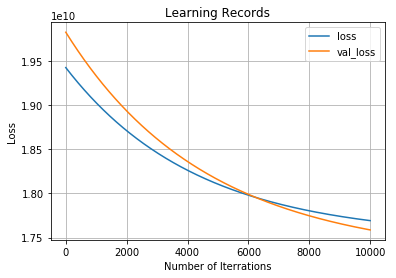

In [8]:
slr.plot_learning_record()

## [Task 3] Remove Terms of Biases

## [Task 4] Make Features Multi-dimentional

## [Task 5] Introduce an Equation for Updates

## [Task6] A Problem about Local Optimization

## [Task 7] What We Can Learn from Implementations from Scratch

    - We are not able to understand how algorithms of scikit-learn works without implementing those from scratch.
    
    - People who tried implementing scikit-learn from scratch are able to fulfill theirown responsibility for explaining why results they got are meaningful.
    
    - Also, We just can learn about high-quality programming. In this case, I definitely grasped structures of class.